# DataScience4Covid

## Work made by: Francisco Pereira, Gil Afonso, Miguel Dias, Samuel Alves

This work is part of a task with the intention to use Machine Learning on Covid-19 datasets.

### Introduction
 Covid-19 is a respiratory disease caused by a new strain of SARS (Severe Acute Respiratory Syndrome) coronavirus that is currently sweeping through the world making a huge impact on the livelihood of most people. Due to its relatively high infectivity and the fact that symptoms of this disease take a long time to be manifested, special measures had to be taken everywhere which include using face masks, washing everything with sanitized alcohol, practicing social distancing and even more drastic measures like putting an entire country in lockdown. The arrival of this new disease has had terrible consequences on the economy of many countries, since the virus started spreading to the rest of the world around March 2020 many establishments have struggled to stay in business and all social events have been prohibited by the government.
 
 Due to the aforementioned measures taken there is a growing number of people that don not believe the negative effects that a disease like this has on the mortality rate using the argument that it is just the flu because the symptoms of this disease are similar to an influenza virus infection. However, this is a statement that has little scientific basis, and using machine learning algorithms it is possible to predict how the mortality rate will vary using data that has already been recorded [1].
 
 The main goal of this work is to prove that the coronavirus is a disease that can have serious consequences in rising mortality rate and that it is not just a typical flu infectious disease.
 
 This analysis consists in using 2 datasets: the main one which has data for every state in the USA containing the number of deaths by Covid-19, Influenza and Pneumonia with their age group and week and a second one that has more information about deaths of Covid-19.
 
 These datasets will be used to build a machine learning model used to predict future deaths caused by influenza, pneumonia and covid-19.
 
### Development


Start by importing the packages needed.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR



from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

Using TensorFlow backend.


We will start by analysing the main dataset so we have to start by opening it.

In [2]:
data = pd.read_csv('Provisional_Death_Counts_for_Influenza__Pneumonia__and_COVID-19.csv',sep=',', index_col = 0, na_values = "na")
print (data.shape)
data.head

(10836, 15)


<bound method NDFrame.head of             Start Week    End Week  MMWRyear  MMWRweek    Group    Indicator  \
Data As Of                                                                     
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
...                ...         ...       ...       ...      ...          ...   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020

As seen, the dataset contains 10836 rows and 15 columns

In [3]:
data.describe()


,MMWRyear,MMWRweek,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths"
count,10836.0,10836.000000,9114.000000,9716.000000,8917.000000,8401.000000,8897.000000,9065.000000
mean,2020.0,26.000000,157.071758,1589.344998,161.858024,4.072372,166.812409,249.488252
std,0.0,12.410246,707.549047,5318.890128,578.399546,27.793888,593.282163,954.621799
min,2020.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,15.000000,0.000000,88.000000,0.000000,0.000000,0.000000,10.000000
50%,2020.0,26.000000,13.000000,386.000000,32.000000,0.000000,34.000000,44.000000
75%,2020.0,37.000000,78.000000,1207.250000,107.000000,0.000000,111.000000,158.000000
max,2020.0,47.000000,17068.000000,78821.000000,11972.000000,654.000000,12444.000000,21222.000000


We can see that by the count some values are missing

In [4]:
data.columns

Index(['Start Week', 'End Week', 'MMWRyear', 'MMWRweek', 'Group', 'Indicator',
       'Jurisdiction', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia or Influenza',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

A simpler way to see all the columns

In [5]:
data.groupby("COVID-19 Deaths").size()

COVID-19 Deaths
0.0        4146
1.0           3
2.0           9
3.0           6
4.0           7
           ... 
13139.0       1
13841.0       1
15426.0       1
16162.0       1
17068.0       1
Length: 906, dtype: int64

To see how many null values we have we use:

In [6]:
data.isnull().sum().sum()

16040

And to dellete them:

In [7]:
datanull=data.dropna()
datanull.isnull().sum().sum()

0

To see all the weeks in this dataset:

In [8]:
data.groupby("Start Week").size()

#len(data.groupby("Start Week"))

Start Week
02/01/2020    252
02/08/2020    252
02/15/2020    252
02/22/2020    252
02/29/2020    252
03/07/2020    252
03/14/2020    252
03/21/2020    252
03/28/2020    252
04/04/2020    252
04/11/2020    252
04/18/2020    252
04/25/2020    252
05/02/2020    252
05/09/2020    252
05/16/2020    252
05/23/2020    252
05/30/2020    252
06/06/2020    252
06/13/2020    252
06/20/2020    252
06/27/2020    252
07/04/2020    252
07/11/2020    252
07/18/2020    252
07/25/2020    252
08/01/2020    252
08/08/2020    252
08/15/2020    252
08/22/2020    252
08/29/2020    252
09/05/2020    252
09/12/2020    252
09/19/2020    252
09/26/2020    252
10/03/2020    252
10/10/2020    252
10/17/2020    252
10/24/2020    252
10/31/2020    252
11/07/2020    252
11/14/2020    252
11/21/2020    252
dtype: int64

Each state is used 172 times:

In [9]:
data.groupby("Jurisdiction").size()

Jurisdiction
Alabama          172
Alaska           172
Arizona          172
Arkansas         172
California       172
                ... 
Virginia         172
Washington       172
West Virginia    172
Wisconsin        172
Wyoming          172
Length: 63, dtype: int64

To see the states in an easier way:

In [10]:
data.Jurisdiction.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'HHS Region 1', 'HHS Region 2', 'HHS Region 3',
       'HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7',
       'HHS Region 8', 'HHS Region 9', 'HHS Region 10'], dtype=object)

In [11]:
data.groupby("Age Group").size()

Age Group
0-17 years     2709
18-64 years    2709
65+ years      2709
All Ages       2709
dtype: int64

Dividing 2709 (how often each age group is used) by 63 (the number of states (although the states are less (50), we have 1 United States, 2 more states than the official ones, and 10 HHS Regions) equal the number of week that is confirmed by using:
```
len(data.groupby("Start Week"))
```

In [12]:
data.groupby("Age Group").count()

,Start Week,End Week,MMWRyear,MMWRweek,Group,Indicator,Jurisdiction,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
Age Group,,,,,,,,,,,,,,
0-17 years,2709,2709,2709,2709,2709,2709,2709,2528,1616,2168,2543,2100,2015,1685
18-64 years,2709,2709,2709,2709,2709,2709,2709,1942,2692,1852,2075,1883,2003,1566
65+ years,2709,2709,2709,2709,2709,2709,2709,2314,2703,2412,1899,2422,2494,1240
All Ages,2709,2709,2709,2709,2709,2709,2709,2330,2705,2485,1884,2492,2553,1211


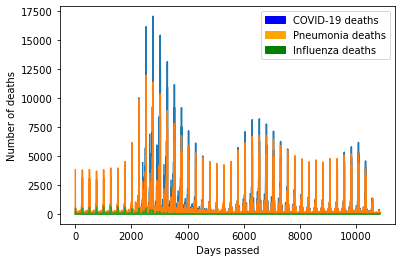

In [13]:
covid_death = list(data['COVID-19 Deaths'])
number = len(covid_death)
index = [num for num in range(number)]
plt.plot(index, covid_death)



pneumonia_death = list(data['Pneumonia Deaths'])
plt.plot( index, pneumonia_death)

influzenza_death = list(data['Influenza Deaths'])
plt.plot( index, influzenza_death)

plt.xlabel("Days passed")
plt.ylabel("Number of deaths")



blue = mpatches.Patch(color='blue', label='COVID-19 deaths')
orange = mpatches.Patch(color='orange', label='Pneumonia deaths')
green = mpatches.Patch(color='green', label='Influenza deaths')
plt.legend(handles=[blue,orange,green])

As it is clearly seen, the number of COVID-19 deaths surpasses the number of Pneumonia and Influenza deaths.

We can remove the columns that are not necessary:

In [3]:
data.drop(['End Week', 'MMWRyear', 'MMWRweek', 'Group', 'Indicator',
          'Total Deaths',
        'Pneumonia or Influenza',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'], axis=1, inplace = True)

Since the data from the auxiliar dataset counts all ages and not by age group like in this dataset, we need to select only the values 'All Ages'

In [4]:
data_age=data.loc[data['Age Group'] == 'All Ages']

In [5]:
data_age.groupby('Age Group').count()

,Start Week,Jurisdiction,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths
Age Group,,,,,
All Ages,2709,2709,2330,2485,1884


Now we will analyze another dataset that could be used to build the model.

The data was obtained from this website: https://covidtracking.com/data/download


First we need to open it:

In [6]:
data2 = pd.read_csv('all-states-history.csv',sep=',', index_col = 0, na_values = "na")
print (data2.shape)
data2.head

(16427, 41)


C:\Users\Samuel\.conda\envs\keras\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method NDFrame.head of            state dataQualityGrade   death  deathConfirmed  deathIncrease  \
date                                                                       
2020-12-20    AK                A   184.0           184.0              0   
2020-12-20    AL                A  4389.0          3849.0              0   
2020-12-20    AR               A+  3237.0          2842.0             46   
2020-12-20    AS                D     0.0             NaN              0   
2020-12-20    AZ               A+  7971.0          7277.0             34   
...          ...              ...     ...             ...            ...   
2020-01-17    WA              NaN     NaN             NaN              0   
2020-01-16    WA              NaN     NaN             NaN              0   
2020-01-15    WA              NaN     NaN             NaN              0   
2020-01-14    WA              NaN     NaN             NaN              0   
2020-01-13    WA              NaN     NaN             NaN 

A small analysis of the dataset:

In [7]:
data2.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,15591.000000,7165.000000,16427.000000,5494.000000,9966.000000,9966.000000,13258.000000,16427.000000,2868.000000,8301.000000,...,1.635800e+04,16427.000000,3241.000000,1487.000000,1356.000000,614.000000,7.002000e+03,1.642700e+04,1.103300e+04,1.642700e+04
mean,2635.069399,2833.454013,18.837828,263.481070,8589.350793,8589.350793,1006.012294,39.195349,1452.472106,319.685098,...,1.311286e+06,14128.145979,127411.668004,103354.531944,122769.369469,79489.757329,7.094130e+05,2.699545e+03,1.499615e+06,1.110010e+04
std,4640.301576,3220.387245,44.567271,380.772274,15494.633634,15494.633634,1674.042619,226.412294,1420.254034,515.323747,...,2.606745e+06,26411.991794,152998.621227,155539.880005,147057.991688,75040.582297,1.013361e+06,2.500635e+04,2.692379e+06,3.707658e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-4124.000000,6.000000,0.000000,...,0.000000e+00,-194215.000000,5.000000,2.000000,1.000000,3.000000,0.000000e+00,-1.122327e+06,0.000000e+00,-5.819440e+05
25%,104.000000,459.000000,0.000000,45.000000,720.250000,720.250000,145.000000,0.000000,387.750000,61.000000,...,5.897250e+04,853.500000,14418.000000,16981.000000,34292.000000,14213.000000,1.256398e+05,0.000000e+00,1.029770e+05,0.000000e+00
50%,704.000000,1825.000000,5.000000,152.000000,3272.500000,3272.500000,485.500000,0.000000,1013.000000,155.000000,...,3.997145e+05,5002.000000,60293.000000,45253.000000,69859.500000,63003.500000,3.273410e+05,0.000000e+00,5.197770e+05,1.064000e+03
75%,2990.000000,3802.000000,18.000000,273.000000,10037.750000,10037.750000,1083.000000,33.000000,1935.000000,332.000000,...,1.379134e+06,15395.000000,198745.000000,123242.000000,127372.000000,126981.750000,9.067368e+05,2.478000e+03,1.693858e+06,1.030450e+04
max,28598.000000,16286.000000,951.000000,1908.000000,89995.000000,89995.000000,18825.000000,16373.000000,7050.000000,5225.000000,...,2.946517e+07,371222.000000,650372.000000,983430.000000,630838.000000,321267.000000,8.223154e+06,8.982590e+05,2.946517e+07,2.352923e+06


In [8]:
data2.columns

Index(['state', 'dataQualityGrade', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsVi

A simpler way to see all the columns

We will need to delete some columns since some of them have no interest for our work with the main dataset.
To identify which one to delete the following link will be used: https://covidtracking.com/about-data/data-definitions

The columns deleted will be:

In [9]:
data2.drop(['dataQualityGrade','deathConfirmed','deathIncrease','deathProbable','hospitalized','hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen','onVentilatorCumulative',
       'onVentilatorCurrently', 'positiveCasesViral',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease','totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'], axis=1, inplace=True)

As such, this dataset will be composed of these columns:

In [10]:
data2.columns

Index(['state', 'death', 'negativeTestsViral', 'positive', 'positiveIncrease',
       'totalTestResults'],
      dtype='object')

In [11]:
data2.head

<bound method NDFrame.head of            state   death  negativeTestsViral  positive  positiveIncrease  \
date                                                                       
2020-12-20    AK   184.0           1144626.0   42413.0               178   
2020-12-20    AL  4389.0                 NaN  322452.0              2548   
2020-12-20    AR  3237.0           1769637.0  201650.0              1536   
2020-12-20    AS     0.0                 NaN       0.0                 0   
2020-12-20    AZ  7971.0                 NaN  453597.0              5366   
...          ...     ...                 ...       ...               ...   
2020-01-17    WA     NaN                 NaN       0.0                 0   
2020-01-16    WA     NaN                 NaN       0.0                 0   
2020-01-15    WA     NaN                 NaN       0.0                 0   
2020-01-14    WA     NaN                 NaN       0.0                 0   
2020-01-13    WA     NaN                 NaN       NaN    

Since the main dataset is grouped in weeks instead of daily results such as this dataset, outside of this notebook, the data was grouped by week, as such, it will be imported as data2_weeks and treated just like the original data2 dataset.

We then import it:

In [12]:
data2_weeks = pd.read_csv('all-states-history_weeks.csv',sep=',', index_col = 0, na_values = "na")

Too see the types for each column:

In [13]:
data2_weeks.dtypes

state                 object
death                  int64
negativeTestsViral     int64
positive               int64
positiveIncrease       int64
totalTestResults       int64
dtype: object

There is no null value on the state column

In [14]:
data2_weeks['state'].isnull().sum().sum()

0

Since the column 'state' is composed of only object type values, we will convert it to integer.
To do that, first we create a new column called 'state_cat' that has the same values as 'state' but its type is category.

In [15]:
data2_weeks['state_cat']=data2_weeks['state'].astype('category')
data2_weeks.head

<bound method NDFrame.head of            state  death  negativeTestsViral  positive  positiveIncrease  \
date                                                                      
12/14/2020    AK   1270             7866561    289610              2675   
12/14/2020    AL  29752                   0   2173442             26821   
12/14/2020    AR  21759            12149477   1361937             15948   
12/14/2020    AS      0                   0         0                 0   
12/14/2020    AZ  53714                   0   3053384             45155   
...          ...    ...                 ...       ...               ...   
01/27/2020    MA      0                   0         0                 0   
01/27/2020    WA      0                   0        14                 0   
01/20/2020    MA      0                   0         0                 0   
01/20/2020    WA      0                   0        13                 1   
01/13/2020    WA      0                   0         1                 

Then we create a new column called 'state_int' on which we will label encode each state.

In [16]:
data2_weeks['state_int']=data2_weeks['state_cat'].cat.codes
data2_weeks.head

<bound method NDFrame.head of            state  death  negativeTestsViral  positive  positiveIncrease  \
date                                                                      
12/14/2020    AK   1270             7866561    289610              2675   
12/14/2020    AL  29752                   0   2173442             26821   
12/14/2020    AR  21759            12149477   1361937             15948   
12/14/2020    AS      0                   0         0                 0   
12/14/2020    AZ  53714                   0   3053384             45155   
...          ...    ...                 ...       ...               ...   
01/27/2020    MA      0                   0         0                 0   
01/27/2020    WA      0                   0        14                 0   
01/20/2020    MA      0                   0         0                 0   
01/20/2020    WA      0                   0        13                 1   
01/13/2020    WA      0                   0         1                 

We can then change every NaN value to 0:

In [17]:
data2_weeks = data2_weeks.replace(np.nan, '0', regex=True)

We then can create a new data frame with only integer:

In [18]:
data2_weeks_int=data2_weeks.filter(['state_int', 'negativeTestsViral', 'positive', 'positiveIncrease','totalTestResults', 'death'],axis=1)

We then normalize the values:

In [19]:
scaler = MinMaxScaler()
data2_weeks_norm = pd.DataFrame(scaler.fit_transform(data2_weeks_int), columns=data2_weeks_int.columns)
data2_weeks_norm.head

<bound method NDFrame.head of       state_int  negativeTestsViral      positive  positiveIncrease  \
0      0.000000            0.100730  2.408666e-02          0.027053   
1      0.018182            0.000000  1.807636e-01          0.105358   
2      0.036364            0.155572  1.132713e-01          0.070097   
3      0.054545            0.000000  0.000000e+00          0.018378   
4      0.072727            0.000000  2.539478e-01          0.164815   
...         ...                 ...           ...               ...   
2366   0.381818            0.000000  0.000000e+00          0.018378   
2367   0.945455            0.000000  1.164370e-06          0.018378   
2368   0.381818            0.000000  0.000000e+00          0.018378   
2369   0.945455            0.000000  1.081201e-06          0.018381   
2370   0.945455            0.000000  8.316929e-08          0.018381   

      totalTestResults     death  
0         4.124914e-02  0.006427  
1         6.157772e-02  0.150559  
2         6.

Now we will create the X and y datasets for both the train and test:

In [20]:
X=data2_weeks_norm.filter(['state_int', 'positive', 'positiveIncrease'],axis=1)
y=data2_weeks_norm['death']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [22]:
y_train.head

<bound method NDFrame.head of 1836    0.010855
1104    0.012130
584     0.254542
550     0.100936
1492    0.017292
          ...   
2338    0.000734
340     0.215414
2252    0.000000
1582    0.020546
2039    0.000541
Name: death, Length: 1659, dtype: float64>

We will create a regression model:

In [23]:
regr_model = linear_model.LinearRegression()
regr_model = regr_model.fit(X_train, y_train)
score=regr_model.score(X_test,y_test)
print(regr_model)

print(score)


LinearRegression()
0.6778174779878183


In [24]:
scores=cross_val_score(regr_model, X,y,cv=4)
scores

array([0.5602119 , 0.67290294, 0.55497907, 0.27891648])

In [25]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.52 accuracy with a standard deviation of 0.15


As seen, the model has a score of 0.74 .

We will create a Support Vector Regression (SVR):

In [26]:
svr = SVR()
svr.fit(X_train, y_train)
prev = svr.predict(X_test)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.7874135797901639
0.7384460564275626


As seen, the model has a test score of 0.758 .

We will now join both datasets but after we ponder about it, it was decided that we will join the whole secondary dataset and as such we will need to transform all columns to weekly.

In [65]:
data2_final = pd.read_csv('all-states-history_final.csv',sep=',', index_col = 0, na_values = "na")
data2_final.head

<bound method NDFrame.head of            state  death  deathConfirmed  deathIncrease  deathProbable  \
date                                                                    
12/14/2020    AK    184             184              8              0   
12/14/2020    AL   4389            3849            287            540   
12/14/2020    AR   3237            2842            292            395   
12/14/2020    AS      0               0              0              0   
12/14/2020    AZ   7971            7277            614            694   
...          ...    ...             ...            ...            ...   
01/27/2020    MA      0               0              0              0   
01/27/2020    WA      0               0              0              0   
01/20/2020    MA      0               0              0              0   
01/20/2020    WA      0               0              0              0   
01/13/2020    WA      0               0              0              0   

            hospital

In [66]:
data2_final = data2_final.iloc[::-1]
data2_final.head

<bound method NDFrame.head of            state  death  deathConfirmed  deathIncrease  deathProbable  \
date                                                                    
01/13/2020    WA      0               0              0              0   
01/20/2020    WA      0               0              0              0   
01/20/2020    MA      0               0              0              0   
01/27/2020    WA      0               0              0              0   
01/27/2020    MA      0               0              0              0   
...          ...    ...             ...            ...            ...   
12/14/2020    AZ   7971            7277            614            694   
12/14/2020    AS      0               0              0              0   
12/14/2020    AR   3237            2842            292            395   
12/14/2020    AL   4389            3849            287            540   
12/14/2020    AK    184             184              8              0   

            hospital

In [67]:
data_final = data2_final.append(data_age)
data_final.head

<bound method NDFrame.head of            state  death  deathConfirmed  deathIncrease  deathProbable  \
01/13/2020    WA    0.0             0.0            0.0            0.0   
01/20/2020    WA    0.0             0.0            0.0            0.0   
01/20/2020    MA    0.0             0.0            0.0            0.0   
01/27/2020    WA    0.0             0.0            0.0            0.0   
01/27/2020    MA    0.0             0.0            0.0            0.0   
...          ...    ...             ...            ...            ...   
11/25/2020   NaN    NaN             NaN            NaN            NaN   
11/25/2020   NaN    NaN             NaN            NaN            NaN   
11/25/2020   NaN    NaN             NaN            NaN            NaN   
11/25/2020   NaN    NaN             NaN            NaN            NaN   
11/25/2020   NaN    NaN             NaN            NaN            NaN   

            hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
01/13/2020        

In [68]:
data_final.columns

Index(['state', 'death', 'deathConfirmed', 'deathIncrease', 'deathProbable',
       'hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease', 'Start

In [69]:
data_final_model=data_final.filter(['Jurisdiction','death', 
                                    'Pneumonia Deaths', 'Influenza Deaths','hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently',
                                    'hospitalizedIncrease'])
data_final_model.head

<bound method NDFrame.head of              Jurisdiction  death  Pneumonia Deaths  Influenza Deaths  \
01/13/2020            NaN    0.0               NaN               NaN   
01/20/2020            NaN    0.0               NaN               NaN   
01/20/2020            NaN    0.0               NaN               NaN   
01/27/2020            NaN    0.0               NaN               NaN   
01/27/2020            NaN    0.0               NaN               NaN   
...                   ...    ...               ...               ...   
11/25/2020   HHS Region 6    NaN             107.0               0.0   
11/25/2020   HHS Region 7    NaN              96.0               0.0   
11/25/2020   HHS Region 8    NaN              31.0               0.0   
11/25/2020   HHS Region 9    NaN             182.0               NaN   
11/25/2020  HHS Region 10    NaN              47.0               0.0   

            hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
01/13/2020           0.0      

In [70]:
data_final_model = data_final_model.replace(np.nan, '-1', regex=True)
data_final_model.isnull().sum().sum()

0

In [71]:
data_final_model['Jurisdiction_cat']=data_final_model['Jurisdiction'].astype('category')
data_final_model['Jurisdiction_int']=data_final_model['Jurisdiction_cat'].cat.codes
data_final_model=data_final_model.filter(['Jurisdiction_int','death', 
                                    'Pneumonia Deaths', 'Influenza Deaths','hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently',
                                    'hospitalizedIncrease'])
data_final_model.columns

Index(['Jurisdiction_int', 'death', 'Pneumonia Deaths', 'Influenza Deaths',
       'hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease'],
      dtype='object')

In [72]:
scaler = MinMaxScaler()
data_final_model_norm = pd.DataFrame(scaler.fit_transform(data_final_model), columns=data_final_model.columns)
data_final_model_norm.head

<bound method NDFrame.head of       Jurisdiction_int     death  Pneumonia Deaths  Influenza Deaths  \
0             0.000000  0.000035          0.000000          0.000000   
1             0.000000  0.000035          0.000000          0.000000   
2             0.000000  0.000035          0.000000          0.000000   
3             0.000000  0.000035          0.000000          0.000000   
4             0.000000  0.000035          0.000000          0.000000   
...                ...       ...               ...               ...   
5075          0.285714  0.000000          0.009020          0.001527   
5076          0.301587  0.000000          0.008102          0.001527   
5077          0.317460  0.000000          0.002673          0.001527   
5078          0.333333  0.000000          0.015284          0.000000   
5079          0.206349  0.000000          0.004009          0.001527   

      hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0         0.000011                0.

In [91]:
X=data_final_model.filter(['Jurisdiction_int', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease'],axis=1)
y=data_final_model.filter(['death'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [89]:
regr_model = linear_model.LinearRegression()
regr_model = regr_model.fit(X_train, y_train)
score=regr_model.score(X_test,y_test)
print(regr_model)

print(score)

LinearRegression()
0.7895981857679609


In [76]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(regr_model, X,y,cv=5)
scores

array([0.56466637, 0.62457853, 0.81097913, 0.        , 0.        ])

In [77]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.40 accuracy with a standard deviation of 0.34


In [78]:
svr = SVR()
svr_fit=svr.fit(X_train, y_train)
prev = svr.predict(X_test)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))
#score_svr=svr.score(X_test, y_test)
scores_svr=cross_val_score(svr_fit, X,y, cv=5)
scores_svr

C:\Users\Samuel\.conda\envs\keras\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-0.0664723214230607
-0.056580655528601254


C:\Users\Samuel\.conda\envs\keras\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Samuel\.conda\envs\keras\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Samuel\.conda\envs\keras\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Samuel\.conda\envs\keras\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

array([-0.06149579, -0.37923701, -0.08765323,  0.        ,  0.        ])

In [79]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_svr.mean(), scores_svr.std()))

-0.11 accuracy with a standard deviation of 0.14


In [80]:
y_train.shape

(3556, 1)

In [81]:
model_lstm = Sequential()
model_lstm.add(Embedding(output_dim = 256))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

TypeError: __init__() missing 1 required positional argument: 'input_dim'

In [82]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [83]:
look_back = 1


In [84]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

ValueError: Must pass 2-d input. shape=(3556, 1, 5)

In [81]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

ValueError: Error when checking input: expected lstm_13_input to have 3 dimensions, but got array with shape (3556, 5)

In [85]:
X_test.shape

(1524, 5)

In [86]:
X_train.shape

(3556, 5)

In [61]:
X_train.rename(columns={'Type': ''}, inplace=True)

In [87]:
X_train.head

<bound method NDFrame.head of             Jurisdiction_int hospitalized hospitalizedCumulative  \
11/25/2020                46           -1                     -1   
04/13/2020                 0          776                    776   
11/25/2020                26           -1                     -1   
11/25/2020                56           -1                     -1   
11/25/2020                48           -1                     -1   
...                      ...          ...                    ...   
04/20/2020                 0         3178                   3178   
11/25/2020                29           -1                     -1   
11/25/2020                35           -1                     -1   
06/29/2020                 0            0                      0   
11/25/2020                14           -1                     -1   

           hospitalizedCurrently hospitalizedIncrease  
11/25/2020                    -1                   -1  
04/13/2020                     0         

In [54]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Dense, Embedding


model = models.Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [99]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [100]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict = history.history

Train on 2844 samples, validate on 712 samples
Epoch 1/10
 128/2844 [>.............................] - ETA: 26s

InvalidArgumentError:  indices[1,1] = -1 is not in [0, 10000)
	 [[node sequential/embedding/embedding_lookup (defined at <ipython-input-100-64f02afe9163>:4) ]] [Op:__inference_distributed_function_3208]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/embedding/embedding_lookup:
 sequential/embedding/embedding_lookup/2026 (defined at C:\Users\Samuel\.conda\envs\keras\lib\contextlib.py:81)

Function call stack:
distributed_function


### References
[1] Lalmuanawma, S., Hussain, J., & Chhakchhuak, L. (2020). Applications of machine learning and artificial intelligence for Covid-19 (SARS-CoV-2) pandemic: A review. Chaos, Solitons & Fractals, 110059.